# 017.00 - Distance Metrics

### Import

In [164]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import Levenshtein
from skimage import io, color
from scipy.stats import multivariate_normal as mnorm
from matplotlib.colors import LogNorm
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from scipy.spatial.distance import squareform
from sklearn import mixture
from mpl_toolkits import mplot3d

### Fonts

In [165]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

# Levenshtein Edit Distance

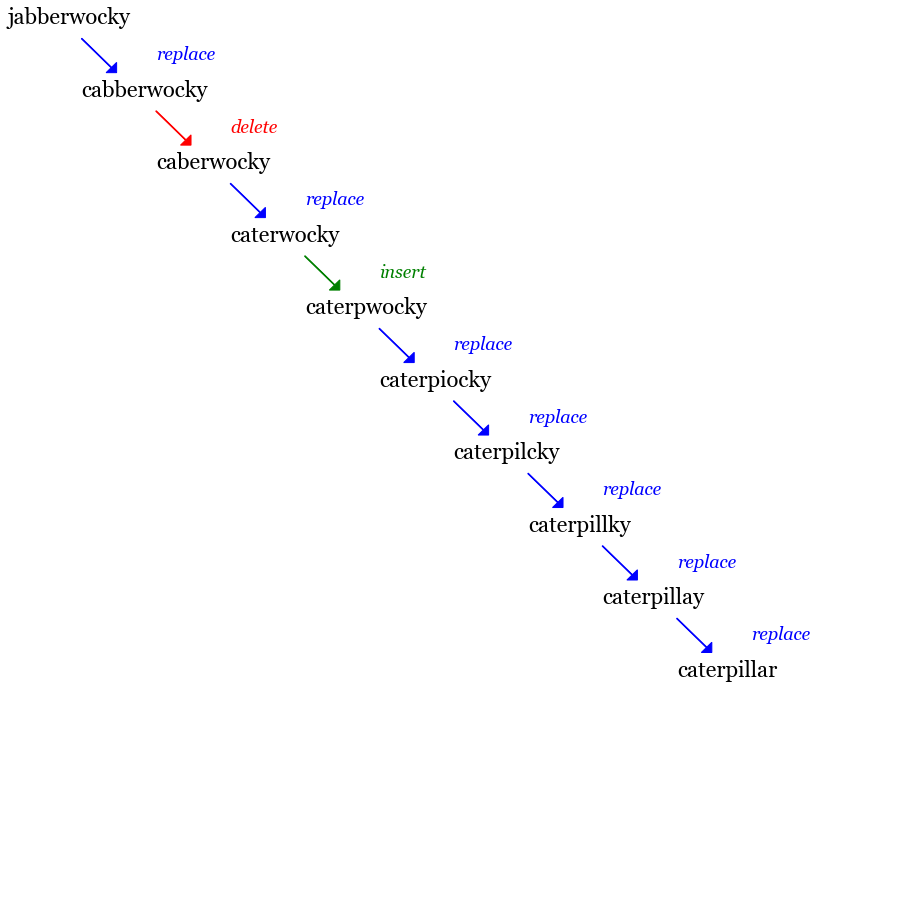

In [169]:
#Levenshtein Edits between string1 and string2 
multiplier = 3
string1 = "jabberwocky"
string2 = "caterpillar"
edits = Levenshtein.editops(string1,string2)
edits.append(tuple(['','','']))

#Intermediate Strings
intermediate_strings = [string1]
intermediate_strings.append(Levenshtein.apply_edit([edits[0]],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:2],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:3],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:4],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:5],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:6],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:7],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:8],string1,string2))
intermediate_strings.append(Levenshtein.apply_edit(edits[:9],string1,string2))
plt.figure(figsize=(16,16))
for i,intermediate in enumerate(intermediate_strings):
    edit = edits[i]
    plt.text(i,-i,intermediate,fontsize=22,**csfont);
    if (edit[0] == 'delete'):
        plt.arrow(i+1,-i-0.2,0.4,-0.4,width=0.01,head_length=0.1,head_width=0.2,ec='r',fc='r')
        plt.text(i+2,-i-0.5,edit[0],c='r',style='italic',fontsize=18,**csfont,ha='left');
    if (edit[0] == 'insert'):
        plt.arrow(i+1,-i-0.2,0.4,-0.4,width=0.01,head_length=0.1,head_width=0.2,ec='g',fc='g')
        plt.text(i+2,-i-0.5,edit[0],c='g',style='italic',fontsize=18,**csfont,ha='left');
    if (edit[0] == 'replace'):
        plt.arrow(i+1,-i-0.2,0.4,-0.4,width=0.01,head_length=0.1,head_width=0.2,ec='b',fc='b')
        plt.text(i+2,-i-0.5,edit[0],c='b',style='italic',fontsize=18,**csfont,ha='left');
plt.axis((0,12,-12,0));
plt.axis('off');
plt.savefig('../../assets/figures/017/other_distance_metrics_levenshtein.png',dpi=300,bbox_inches="tight")

# Jaccard Distance
Given two vectors, u and v, the Jaccard distance is the proportion of those elements u[i] and v[i] that disagree.

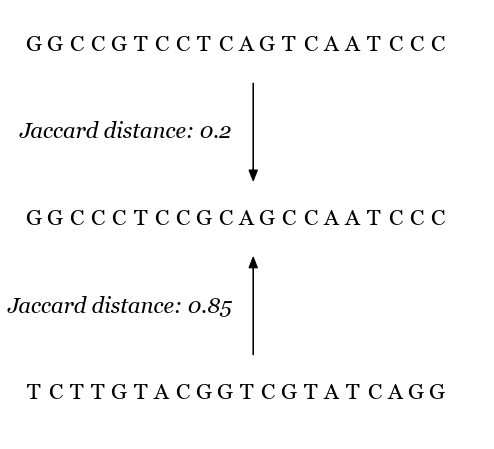

In [170]:
bases = np.array(['A','C','G','T'])
dna1 = np.random.randint(0,4,20)
dna2 = np.random.randint(0,4,20)
dna3 = dna2.copy()
dna3[::4] = np.random.randint(0,4,5)
jaccard_dna1_dna2 = np.sum(dna2 == dna1) / len(dna2)
jaccard_dna2_dna3 = np.sum(dna2 == dna3) / len(dna2)
jaccard_dna1_dna3 = np.sum(dna1 == dna3) / len(dna2)

plt.figure(figsize=(8,8))
for i in range(len(dna1)):
    plt.text(i,-0.8,bases[dna1[i]],c='k',fontsize=22,**csfont,ha='right');
    plt.text(i,+0.0,bases[dna2[i]],c='k',fontsize=22,**csfont,ha='right');
    plt.text(i,+0.8,bases[dna3[i]],c='k',fontsize=22,**csfont,ha='right');
plt.text(9,0.4,'Jaccard distance: ' + str(jaccard_dna1_dna2),fontsize=22,**csfont,ha='right',style='italic');
plt.text(9,-0.4,'Jaccard distance: ' + str(jaccard_dna2_dna3),fontsize=22,**csfont,ha='right',style='italic');
plt.axis((0,21,-1,1));
plt.axis('off');
plt.arrow(10,-0.60,0,0.40,width=0.01,head_length=0.05,head_width=0.4,facecolor='k')
plt.arrow(10,+0.65,0,-0.40,width=0.01,head_length=0.05,head_width=0.4,facecolor='k')
plt.savefig('../../assets/figures/017/other_distance_metrics_jaccard.png',dpi=300,bbox_inches="tight")

### Cosine Distance

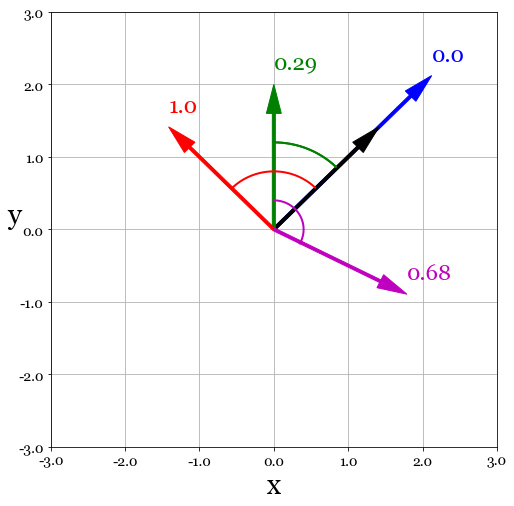

In [177]:
resolution = 7
val = np.linspace(0,2*np.pi,361)[:-1]
x = np.cos(val)
y = np.sin(val)
v1 = np.array([1,1])
v2 = np.array([2,2])
v3 = np.array([0,1])
v4 = np.array([-1,1])
v5 = np.array([1,-0.5])
v1 = v1 / np.linalg.norm(v1)
v2 = v2 / np.linalg.norm(v2)*1.5
v3 = v3 / np.linalg.norm(v3)
v4 = v4 / np.linalg.norm(v4)
v5 = v5 / np.linalg.norm(v5)
plt.figure(figsize=(8,8))
plt.arrow(0,0,v1[0],v1[1],width=0.02,head_length=0.2,head_width=0.1,fc='k',ec='k',length_includes_head=True,zorder=100)
plt.arrow(0,0,v2[0],v2[1],width=0.02,head_length=0.2,head_width=0.1,fc='b',ec='b',length_includes_head=True,zorder=10)
plt.arrow(0,0,v3[0],v3[1],width=0.02,head_length=0.2,head_width=0.1,fc='g',ec='g',length_includes_head=True,zorder=100)
plt.arrow(0,0,v4[0],v4[1],width=0.02,head_length=0.2,head_width=0.1,fc='r',ec='r',length_includes_head=True,zorder=100)
plt.arrow(0,0,v5[0],v5[1],width=0.02,head_length=0.2,head_width=0.1,fc='m',ec='m',length_includes_head=True,zorder=100)
plt.axis((-1.5,1.5,-1.5,1.5));
plt.plot(y[0:45]*0.6,x[0:45]*0.6,linewidth=2,zorder=100,color='g')
plt.plot(y[0:45]*0.6,x[0:45]*0.6,linewidth=2,zorder=100,color='g')
plt.plot(y[0:45]*0.4,x[0:45]*0.4,linewidth=2,zorder=100,color='r')
plt.plot(y[315:]*0.4,x[315:]*0.4,linewidth=2,zorder=100,color='r')
plt.plot(y[0:120]*0.2,x[0:120]*0.2,linewidth=2,zorder=100,color='m')

v1 = np.expand_dims(v1,-1).T
v2 = np.expand_dims(v2,-1).T
v3 = np.expand_dims(v3,-1).T
v4 = np.expand_dims(v4,-1).T
v5 = np.expand_dims(v5,-1).T
sc2 = np.round(cdist(v1,v2,'cosine')[0][0],2)
sc3 = np.round(cdist(v1,v3,'cosine')[0][0],2)
sc4 = np.round(cdist(v1,v4,'cosine')[0][0],2)
sc5 = np.round(cdist(v1,v5,'cosine')[0][0],2)

plt.text(v2[0,0],v2[0,1]+0.1,str(sc2),c='b',fontsize=22,**csfont,ha='left');
plt.text(v3[0,0],v3[0,1]+0.1,str(sc3),c='g',fontsize=22,**csfont,ha='left');
plt.text(v4[0,0],v4[0,1]+0.1,str(sc4),c='r',fontsize=22,**csfont,ha='left');
plt.text(v5[0,0],v5[0,1]+0.1,str(sc5),c='m',fontsize=22,**csfont,ha='left');
plt.grid()
plt.xlabel('x',fontsize=28,**csfont);
plt.ylabel('y',fontsize=28,**csfont,rotation=0);
plt.yticks(np.linspace(-1.5,1.5,resolution),labels=np.linspace(-3,3,resolution),fontsize=14,**csfont);
plt.xticks(np.linspace(-1.5,1.5,resolution),labels=np.linspace(-3,3,resolution),fontsize=14,**csfont);
plt.savefig('../../assets/figures/017/other_distance_metrics_cosine.png',dpi=300,bbox_inches="tight")